<a href="https://colab.research.google.com/github/Zesmat/Market-Price-Prediction/blob/main/Market_price2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning

In [69]:
df=pd.read_csv('/content/MarketPricePrediction (1).csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,Jan-05
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,Jan-06
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,Jan-10
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,Jan-11
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,Jan-12


### Convert date-time format

In [70]:
df['date_string'] = df['date'].astype(str) + '-' + df['year'].astype(str) #Jan-05-202
df['datetime'] = pd.to_datetime(df['date_string'], errors='coerce')
df = df.drop(['date_string', 'month', 'year', 'date'], axis=1) #delete(drop) unwanted columns
df

,market,quantity,priceMin,priceMax,priceMod,state,city,datetime
0,ABOHAR(PB),2350,404,493,446,PB,ABOHAR,2005-01-05
1,ABOHAR(PB),900,487,638,563,PB,ABOHAR,2006-01-06
2,ABOHAR(PB),790,1283,1592,1460,PB,ABOHAR,2010-01-10
3,ABOHAR(PB),245,3067,3750,3433,PB,ABOHAR,2011-01-11
4,ABOHAR(PB),1035,523,686,605,PB,ABOHAR,2012-01-12
...,...,...,...,...,...,...,...,...
10222,YEOLA(MS),131326,282,612,526,MS,YEOLA,2011-12-11
10223,YEOLA(MS),207066,485,1327,1136,MS,YEOLA,2012-12-12
10224,YEOLA(MS),215883,472,1427,1177,MS,YEOLA,2013-12-13
10225,YEOLA(MS),201077,446,1654,1456,MS,YEOLA,2014-12-14


In [71]:
df = df.sort_values('datetime')
df['datetime'] = df['datetime'].interpolate()
price_columns = ['priceMin', 'priceMax', 'priceMod']
df['priceAvg'] = df[price_columns].mean(axis=1)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 10227 entries, 6061 to 9398
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   market    10227 non-null  object        
 1   quantity  10227 non-null  int64         
 2   priceMin  10227 non-null  int64         
 3   priceMax  10227 non-null  int64         
 4   priceMod  10227 non-null  int64         
 5   state     10227 non-null  object        
 6   city      10227 non-null  object        
 7   datetime  10227 non-null  datetime64[ns]
 8   priceAvg  10227 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 799.0+ KB


,market,quantity,priceMin,priceMax,priceMod,state,city,datetime,priceAvg
6061,MAHUVA(GUJ),31094,294,508,454,GUJ,MAHUVA,2001-01-01,418.666667
6436,MANMAD(MS),151765,248,519,463,MS,MANMAD,2001-01-01,410.000000
5404,LASALGAON(MS),295435,219,545,494,MS,LASALGAON,2001-01-01,419.333333
8614,SAIKHEDA(MS),25424,293,528,473,MS,SAIKHEDA,2001-01-01,431.333333
1579,CHAKAN(MS),76267,239,562,441,MS,CHAKAN,2001-01-01,414.000000
...,...,...,...,...,...,...,...,...,...
9380,SINNAR(MS),21367,115,739,637,MS,SINNAR,2016-02-16,497.000000
9395,SINNAR(MS),12228,143,1003,708,MS,SINNAR,2016-02-16,618.000000
9396,SINNAR(MS),15600,219,1219,1013,MS,SINNAR,2016-02-16,817.000000
9397,SINNAR(MS),51425,98,323,281,MS,SINNAR,2016-02-16,234.000000


In [72]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

market: 120 distinct values
quantity: 8641 distinct values
priceMin: 2026 distinct values
priceMax: 2732 distinct values
priceMod: 2424 distinct values
state: 21 distinct values
city: 117 distinct values
datetime: 182 distinct values
priceAvg: 4689 distinct values


In [73]:
# Checking null values
print(df.isnull().sum())

market      0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
datetime    0
priceAvg    0
dtype: int64


## 2. Exploratory Data Analysis (EDA)


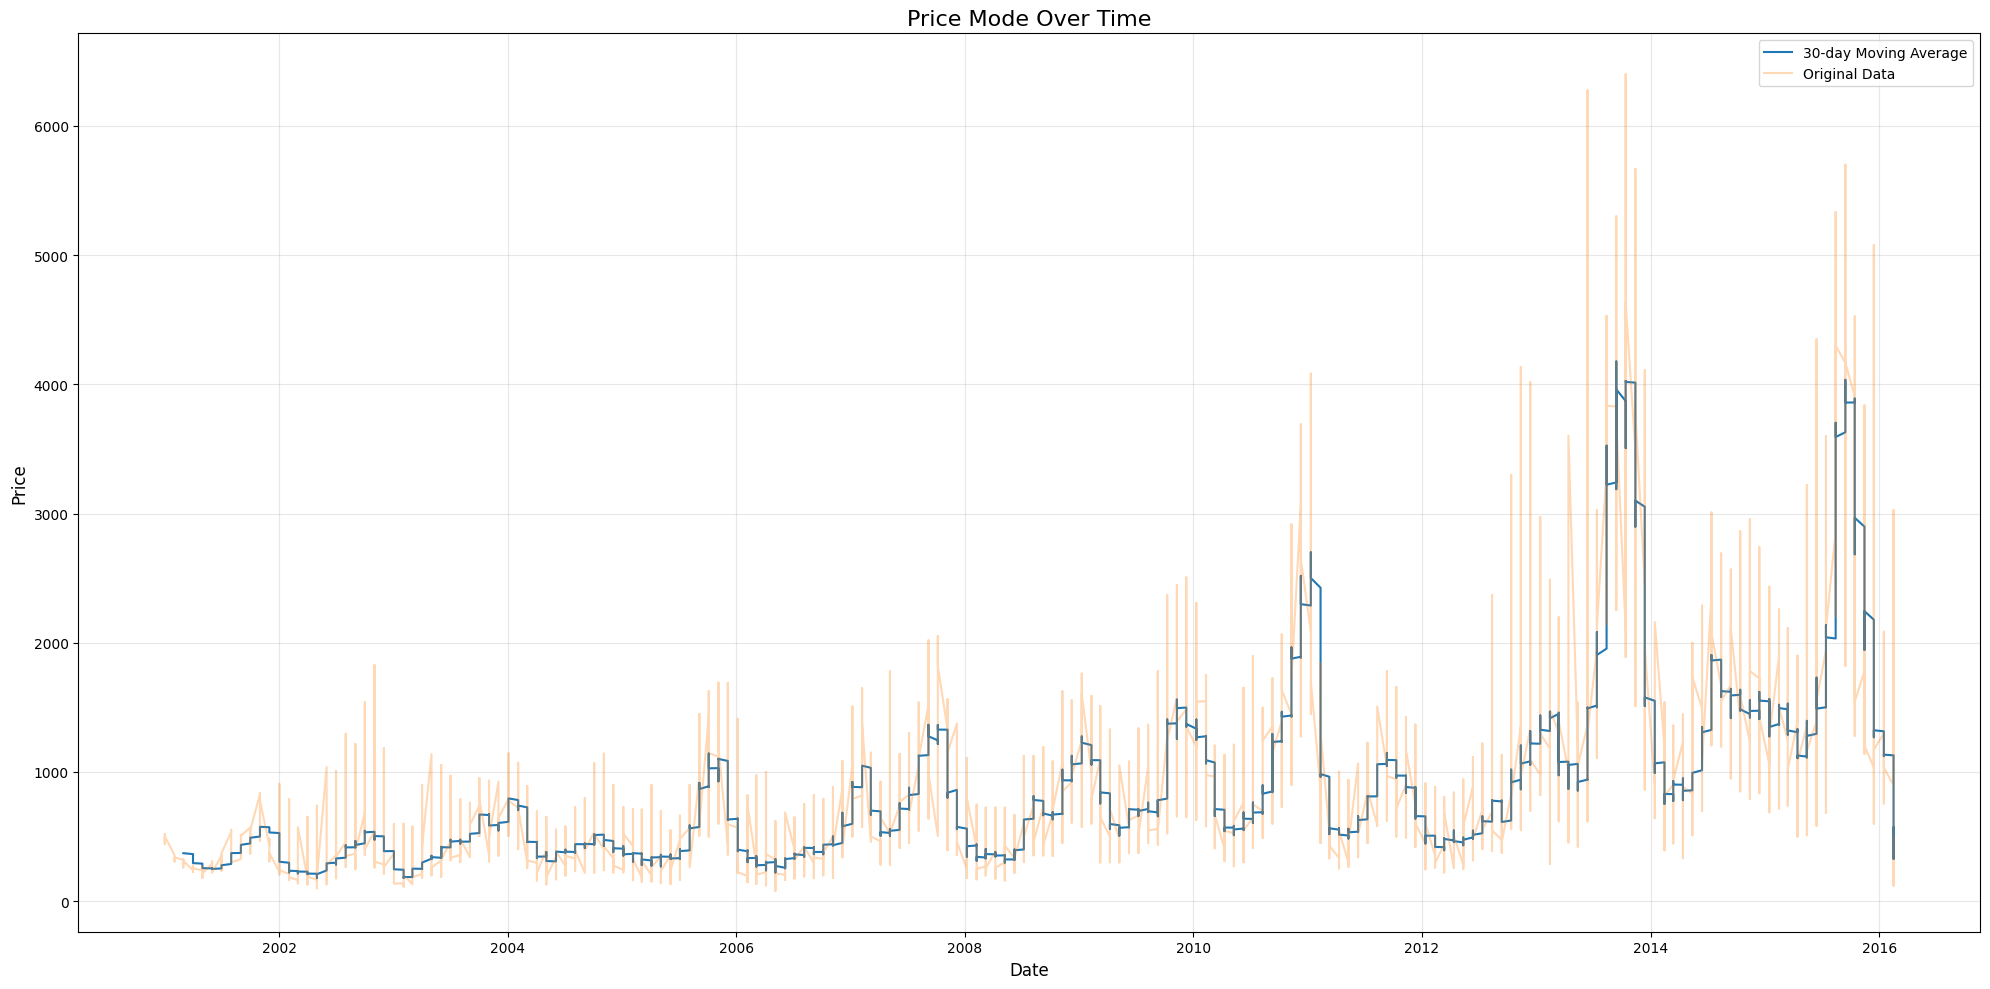

In [74]:

# Assuming df is your DataFrame
plt.figure(figsize=(20, 10))

# Option 1: Use a rolling average to smooth out the curve
window_size = 30  # Adjust this value to change the smoothing level
df['rolling_average'] = df['priceMod'].rolling(window=window_size).mean()
plt.plot(df['datetime'], df['rolling_average'], label=f'{window_size}-day Moving Average')



# Original data (optional, might make the plot too busy)
plt.plot(df['datetime'], df['priceMod'], alpha=0.3, label='Original Data')

plt.title('Price Mode Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)



plt.tight_layout()
plt.show()

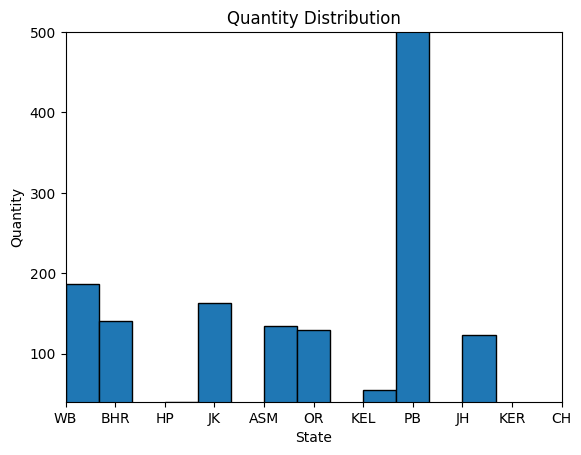

In [75]:
plt.hist(df['state'], bins=30, edgecolor='black')
plt.title('Quantity Distribution')
plt.xlabel('State')
plt.ylabel('Quantity')
plt.xlim(10, 20)  # Set x-axis limits
plt.ylim(40, 500)  # Set y-axis limits
plt.show()

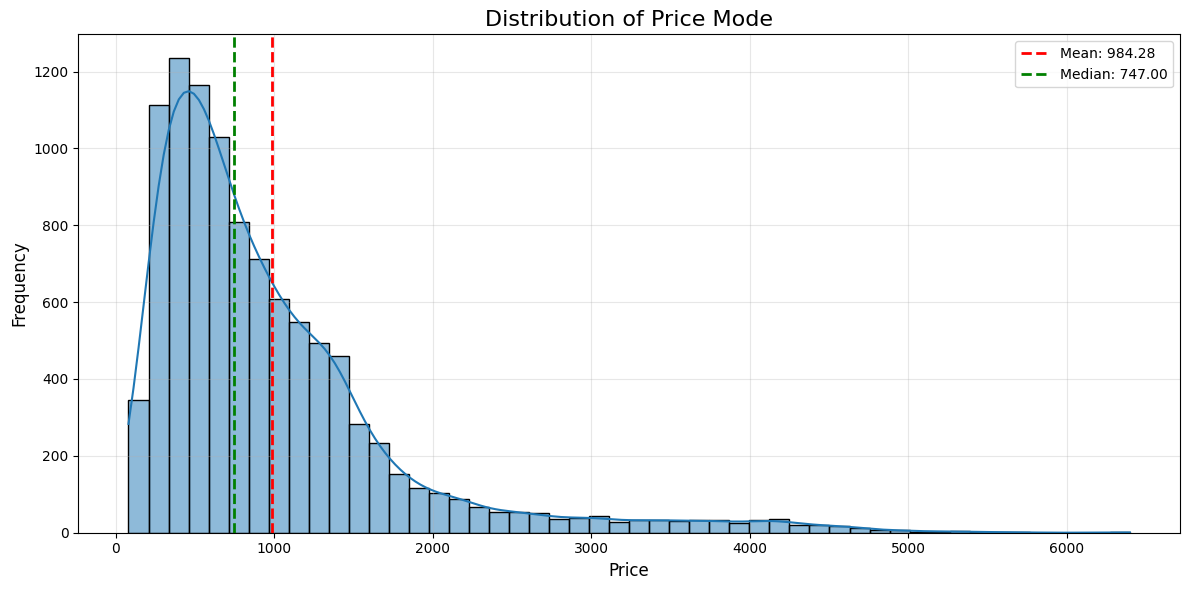

Mean Price: 984.28
Median Price: 747.00
Minimum Price: 80.00
Maximum Price: 6400.00


In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(data=df, x='priceMod', kde=True, bins=50)

plt.title('Distribution of Price Mode', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add mean and median lines
mean_price = df['priceMod'].mean()
median_price = df['priceMod'].median()

plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_price:.2f}')
plt.axvline(median_price, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_price:.2f}')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print some summary statistics
print(f"Mean Price: {mean_price:.2f}")
print(f"Median Price: {median_price:.2f}")
print(f"Minimum Price: {df['priceMod'].min():.2f}")
print(f"Maximum Price: {df['priceMod'].max():.2f}")

In [ ]:
corr = df[['quantity', 'priceMin', 'priceMax', 'priceMod']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

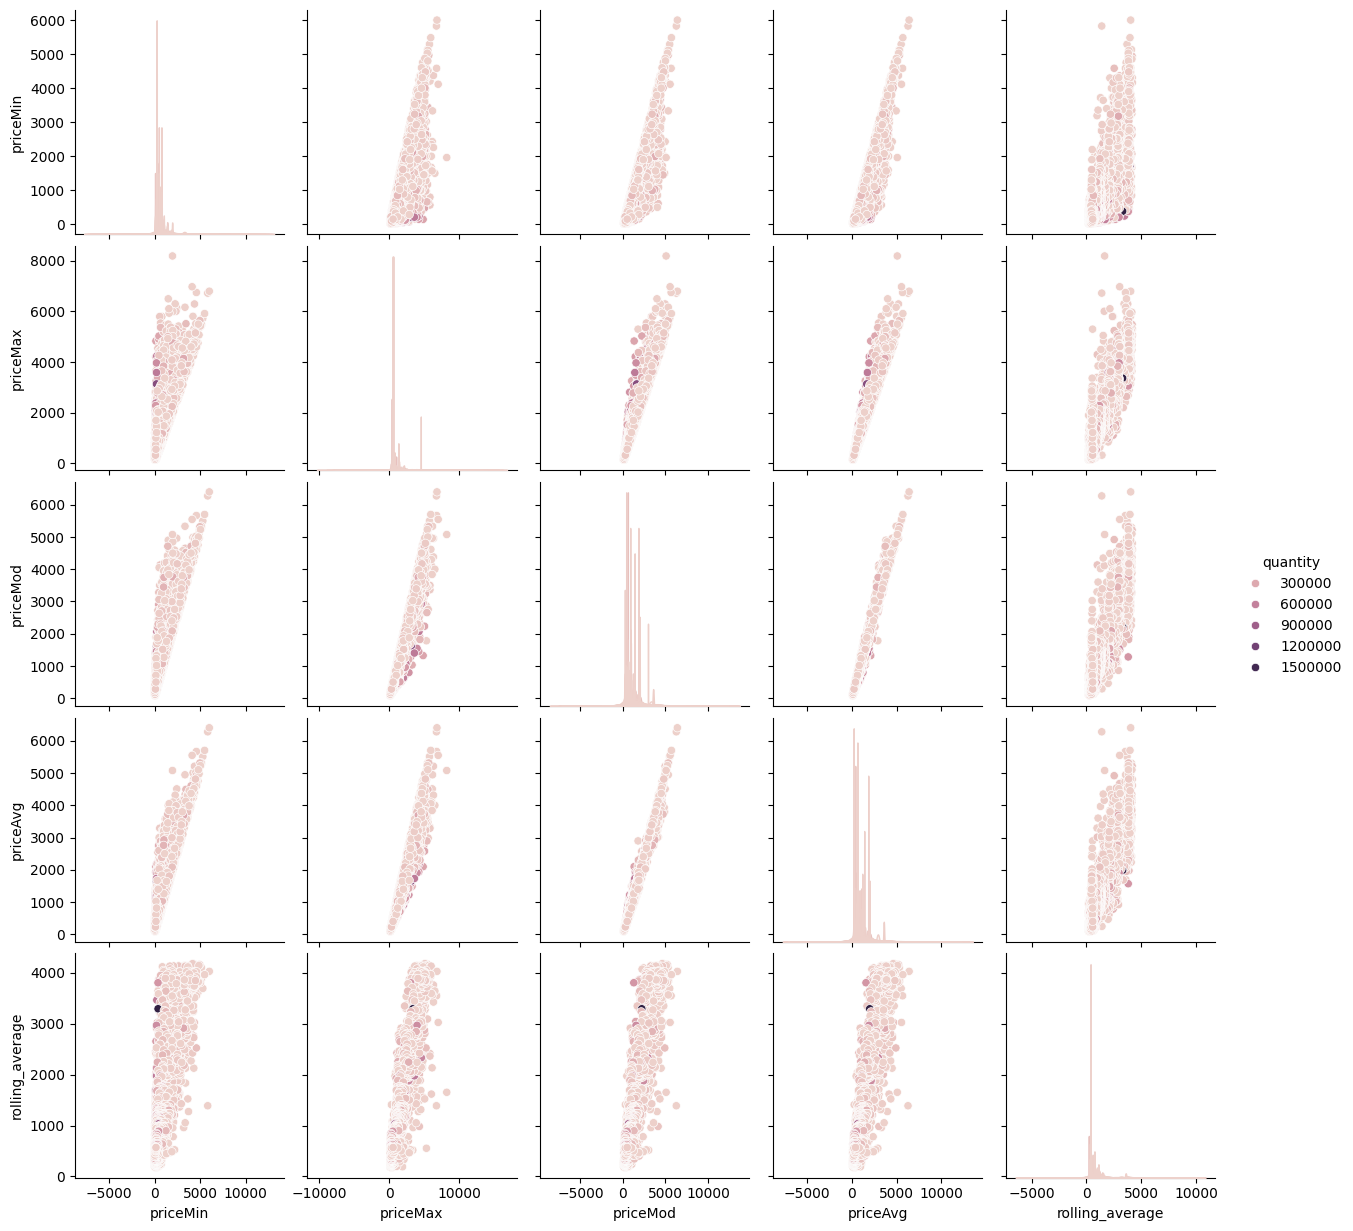

In [78]:
# Pair plot for numeric features
sns.pairplot(df, hue='quantity')
plt.show()

### Handling Categrical Values(label)

In [79]:
from sklearn.preprocessing import LabelEncoder
df['city']=LabelEncoder().fit_transform(df['city'])
df['state']=LabelEncoder().fit_transform(df['state'])
df['market']=LabelEncoder().fit_transform(df['market'])

df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 10227 entries, 6061 to 9398
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   market           10227 non-null  int64         
 1   quantity         10227 non-null  int64         
 2   priceMin         10227 non-null  int64         
 3   priceMax         10227 non-null  int64         
 4   priceMod         10227 non-null  int64         
 5   state            10227 non-null  int64         
 6   city             10227 non-null  int64         
 7   datetime         10227 non-null  datetime64[ns]
 8   priceAvg         10227 non-null  float64       
 9   rolling_average  10198 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(7)
memory usage: 878.9 KB


,market,quantity,priceMin,priceMax,priceMod,state,city,datetime,priceAvg,rolling_average
6061,73,31094,294,508,454,5,70,2001-01-01,418.666667,NaN
6436,76,151765,248,519,463,14,73,2001-01-01,410.000000,NaN
5404,68,295435,219,545,494,14,65,2001-01-01,419.333333,NaN
8614,101,25424,293,528,473,14,98,2001-01-01,431.333333,NaN
1579,21,76267,239,562,441,14,21,2001-01-01,414.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
9380,108,21367,115,739,637,14,105,2016-02-16,497.000000,519.466667
9395,108,12228,143,1003,708,14,105,2016-02-16,618.000000,534.600000
9396,108,15600,219,1219,1013,14,105,2016-02-16,817.000000,560.800000
9397,108,51425,98,323,281,14,105,2016-02-16,234.000000,559.066667


#Feature engineering

In [80]:
df_scaled['priceMod_lag1'] = df_scaled.groupby('market')['priceMod'].shift(1)
df_scaled['priceMod_lag3'] = df_scaled.groupby('market')['priceMod'].shift(3)
df_scaled['priceMod_lag6'] = df_scaled.groupby('market')['priceMod'].shift(6)
df_scaled['priceMod_rolling_mean3'] = df_scaled.groupby('market')['priceMod'].rolling(window=3).mean().reset_index(0, drop=True)
df_scaled['priceMod_rolling_mean6'] = df_scaled.groupby('market')['priceMod'].rolling(window=6).mean().reset_index(0, drop=True)
df_scaled['month'] = df_scaled['datetime'].dt.month
df_scaled['quarter'] = df_scaled['datetime'].dt.quarter


df_scaled

NameError: name 'df_scaled' is not defined

### Normalization(standrizattion)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
numeric_cols = ['quantity', 'priceMin', 'priceMax', 'priceMod','priceAvg']
df_scaled = df.copy()
scaler = MinMaxScaler()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])
df_scaled.info()
df_scaled

In [ ]:
for col in ['priceMod_lag1', 'priceMod_lag3', 'priceMod_lag6', 'priceMod_rolling_mean3', 'priceMod_rolling_mean6']:
    df_scaled[col].fillna(df_scaled[col].mean(), inplace=True)


df_featured=df_scaled
df_featured

#Model Training

###Preparing data

In [ ]:
X = df_featured.drop(['priceMod', 'datetime', 'priceMin', 'priceMax'], axis=1)
y = df_featured['priceMod']
df_featured

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [ ]:
# SARIMA Model
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

def train_sarima(data):
    # Assuming we're predicting for a specific market
    market_data = data[data['market'] == 0]['priceMod']

    # Find optimal SARIMA parameters
    model = auto_arima(market_data, seasonal=True, m=12, suppress_warnings=True, stepwise=True)

    # Fit the SARIMA model
    sarima_model = SARIMAX(market_data, order=model.order, seasonal_order=model.seasonal_order)
    results = sarima_model.fit()

    return results
forecast_steps = len(y_test)
sarima_model = train_sarima(df_featured)
sarima_forecast = sarima_model.forecast(steps=forecast_steps)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"{model_name} Performance:")
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.2f}")

evaluate_model(y_test, rf_predictions, "Random Forest")
evaluate_model(y_test, sarima_forecast, "SARIMA")

In [ ]:
!pip install pmdarima

In [ ]:

plt.figure(figsize=(15, 6))
plt.plot(df_featured['datetime'], df_featured['priceMod'], label='Actual')

# Assuming 'rf_predictions' corresponds to the test set 'X_test',
# we need to extract the corresponding datetime values
plt.plot(df_featured['datetime'].iloc[-len(rf_predictions):], rf_predictions, label='Random Forest')

plt.plot(df_featured['datetime'].iloc[-len(sarima_forecast):], sarima_forecast, label='SARIMA') # Similar adjustment for SARIMA
plt.title('Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import pmdarima as pm

# Find the optimal SARIMA parameters
sarimax_model = pm.auto_arima(df_featured['priceMod'], seasonal=True, m=12, suppress_warnings=True, stepwise=True)
print(f"Optimal SARIMA parameters: {sarimax_model.order}, {sarimax_model.seasonal_order}")

# Fit the SARIMA model
sarima_model = SARIMAX(df_featured['priceMod'], order=sarimax_model.order, seasonal_order=sarimax_model.seasonal_order)
sarima_results = sarima_model.fit()

# Generate future predictions
future_steps = 12
future_dates = pd.date_range(start=df_featured['datetime'].iloc[-1] + pd.Timedelta(days=1), periods=future_steps, freq='M')
future_predictions = sarima_results.forecast(steps=future_steps)

# Create a new DataFrame for the future predictions
future_df = pd.DataFrame({'datetime': future_dates, 'priceMod_forecast': future_predictions})

# Visualize the historical data and future predictions
plt.figure(figsize=(15, 6))
plt.plot(df_featured['datetime'], df_featured['priceMod'], label='Historical Data')
plt.plot(future_df['datetime'], future_df['priceMod_forecast'], label='Future Predictions', color='red')
plt.title('Historical Data and Future Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the future predictions
print("Future Predictions:")
for date, price in zip(future_df['datetime'], future_df['priceMod_forecast']):
    print(f"{date.strftime('%Y-%m-%d')}: {price:.2f}")